In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Lecture du Fichier Component Size

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Chemin vers le fichier Parquet
chemin_fichier_parquet = "/content/drive/My Drive/DAC/PLDAC/Data/part-00000-e6d8696c-b587-4027-ab29-734e311a33fe-c000.snappy.parquet"

# Lecture du fichier Parquet et création du DataFrame
try:
    data = pd.read_parquet(chemin_fichier_parquet, engine='pyarrow')
    # Afficher le DataFrame
    print(data.head())
except Exception as e:
    print("Une erreur s'est produite lors de la lecture du fichier Parquet :", e)

   compID  size
0    7044     5
1   16965     5
2   31427     5
3   34321     5
4   35262     5


In [65]:
data.shape

(67957171, 2)

# Création d'un histogramme

D'aprés cet histogramme, nous pouvons dire que les composantes les plus fréquentes ont de petites tailles

In [66]:
# sns.histplot(data['size'], bins=30)
# plt.show()

In [67]:
# plt.boxplot(data['size'])

# plt.title("boxplot des tailles de composantes")

# plt.ylabel('Tailles')

# plt.gca().xaxis.set_ticklabels(['C'])
# plt.show()

# Création d'un dictionnaire pour grouper les tailles des composantes et leurs fréquences

In [68]:
unique_values_sorted = data['size'].unique()
unique_values_sorted.sort()
print("Le nombre de taille differentes : ",len(unique_values_sorted))


Le nombre de taille differentes :  1454


In [69]:
frequencies = data['size'].value_counts()
data_dict = frequencies.to_dict()

## Trier le dictionnaire en fonction des tailles

In [70]:
sorted_size = dict(sorted(data_dict.items()))
sorted_size

{2: 46848540,
 3: 11061956,
 4: 3882564,
 5: 1703466,
 6: 1220311,
 7: 576355,
 8: 433305,
 9: 430156,
 10: 238221,
 11: 190777,
 12: 216852,
 13: 126102,
 14: 109627,
 15: 118404,
 16: 76935,
 17: 67462,
 18: 70440,
 19: 49822,
 20: 44020,
 21: 45157,
 22: 33365,
 23: 29702,
 24: 29730,
 25: 23599,
 26: 21549,
 27: 20787,
 28: 17025,
 29: 15634,
 30: 15115,
 31: 12794,
 32: 12000,
 33: 11271,
 34: 9824,
 35: 9145,
 36: 8662,
 37: 7895,
 38: 7261,
 39: 7061,
 40: 6478,
 41: 5793,
 42: 5621,
 43: 5240,
 44: 4846,
 45: 4582,
 46: 4297,
 47: 4083,
 48: 3954,
 49: 3608,
 50: 3448,
 51: 3287,
 52: 3108,
 53: 2948,
 54: 2771,
 55: 2730,
 56: 2573,
 57: 2385,
 58: 2363,
 59: 2205,
 60: 2073,
 61: 1998,
 62: 1970,
 63: 1971,
 64: 1749,
 65: 1722,
 66: 1675,
 67: 1577,
 68: 1512,
 69: 1539,
 70: 1384,
 71: 1355,
 72: 1285,
 73: 1309,
 74: 1246,
 75: 1153,
 76: 1069,
 77: 1100,
 78: 1033,
 79: 1099,
 80: 969,
 81: 996,
 82: 943,
 83: 908,
 84: 818,
 85: 813,
 86: 784,
 87: 832,
 88: 764,
 89: 72

### Distribution des 20 tailles les plus petites


Après avoir analysé la distribution des 20 plus petites tailles de composants, nous avons remarqué que la majorité de ces tailles ont une fréquence élevée.

In [71]:
from itertools import islice

top_20 = dict(islice(sorted_size.items(), 20))
df = pd.DataFrame(list(top_20.items()), columns=['Size of Component', 'Frequency'])

<ipython-input-72-875668b4f267>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0.5, 1.0, 'Distribution de la taille des composants')

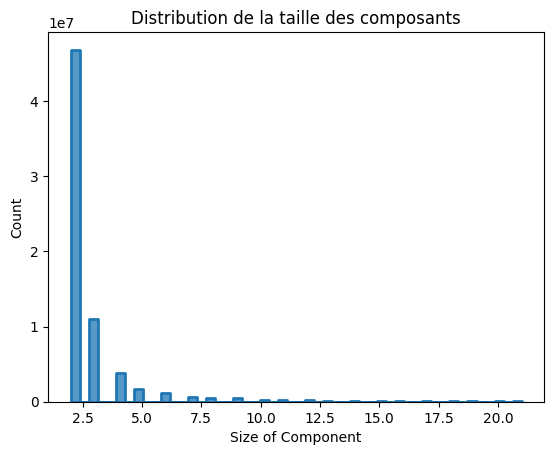

In [72]:
sns.histplot(data=df, x='Size of Component', weights='Frequency', bins=50, kde=False, palette='viridis', element='step', linewidth=2)
plt.title('Distribution de la taille des composants')

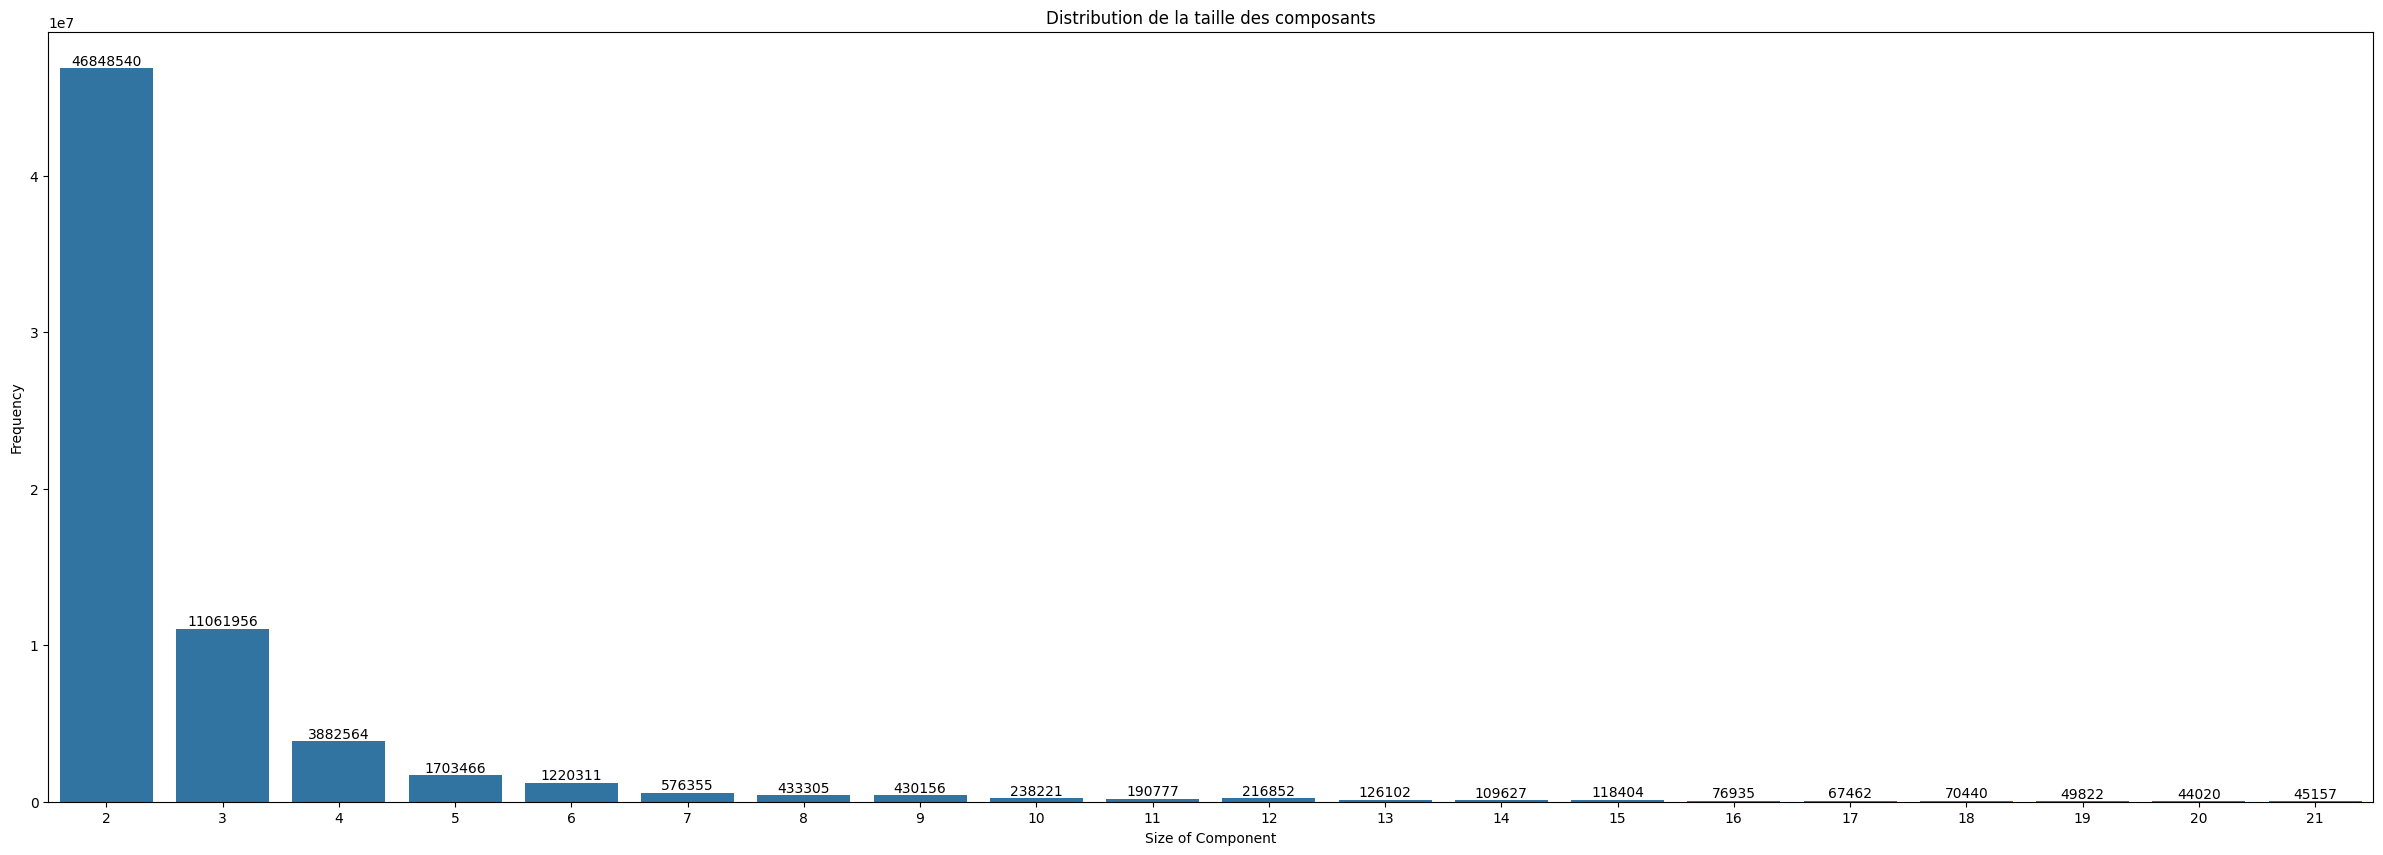

In [73]:
plt.figure(figsize=(30, 10))
sns.barplot(data=df, x='Size of Component', y='Frequency')

for index, row in df.iterrows():
    plt.text(index, row['Frequency'], str(row['Frequency']), ha='center', va='bottom')
plt.xlabel('Size of Component')
plt.ylabel('Frequency')
plt.title('Distribution de la taille des composants')

plt.show()

### Distribution des 50 tailles les plus grandes


D'après l'histogramme ci-dessous, il est clair que la plupart des composantes ayant une taille importante ont une fréquence très faible, souvent égale à une.

In [74]:
bottom_50 = dict(islice(sorted(sorted_size.items(), key=lambda x: x[0], reverse=True), 50))
df_2 = pd.DataFrame(list(bottom_50.items()), columns=['Size of Component', 'Frequency'])

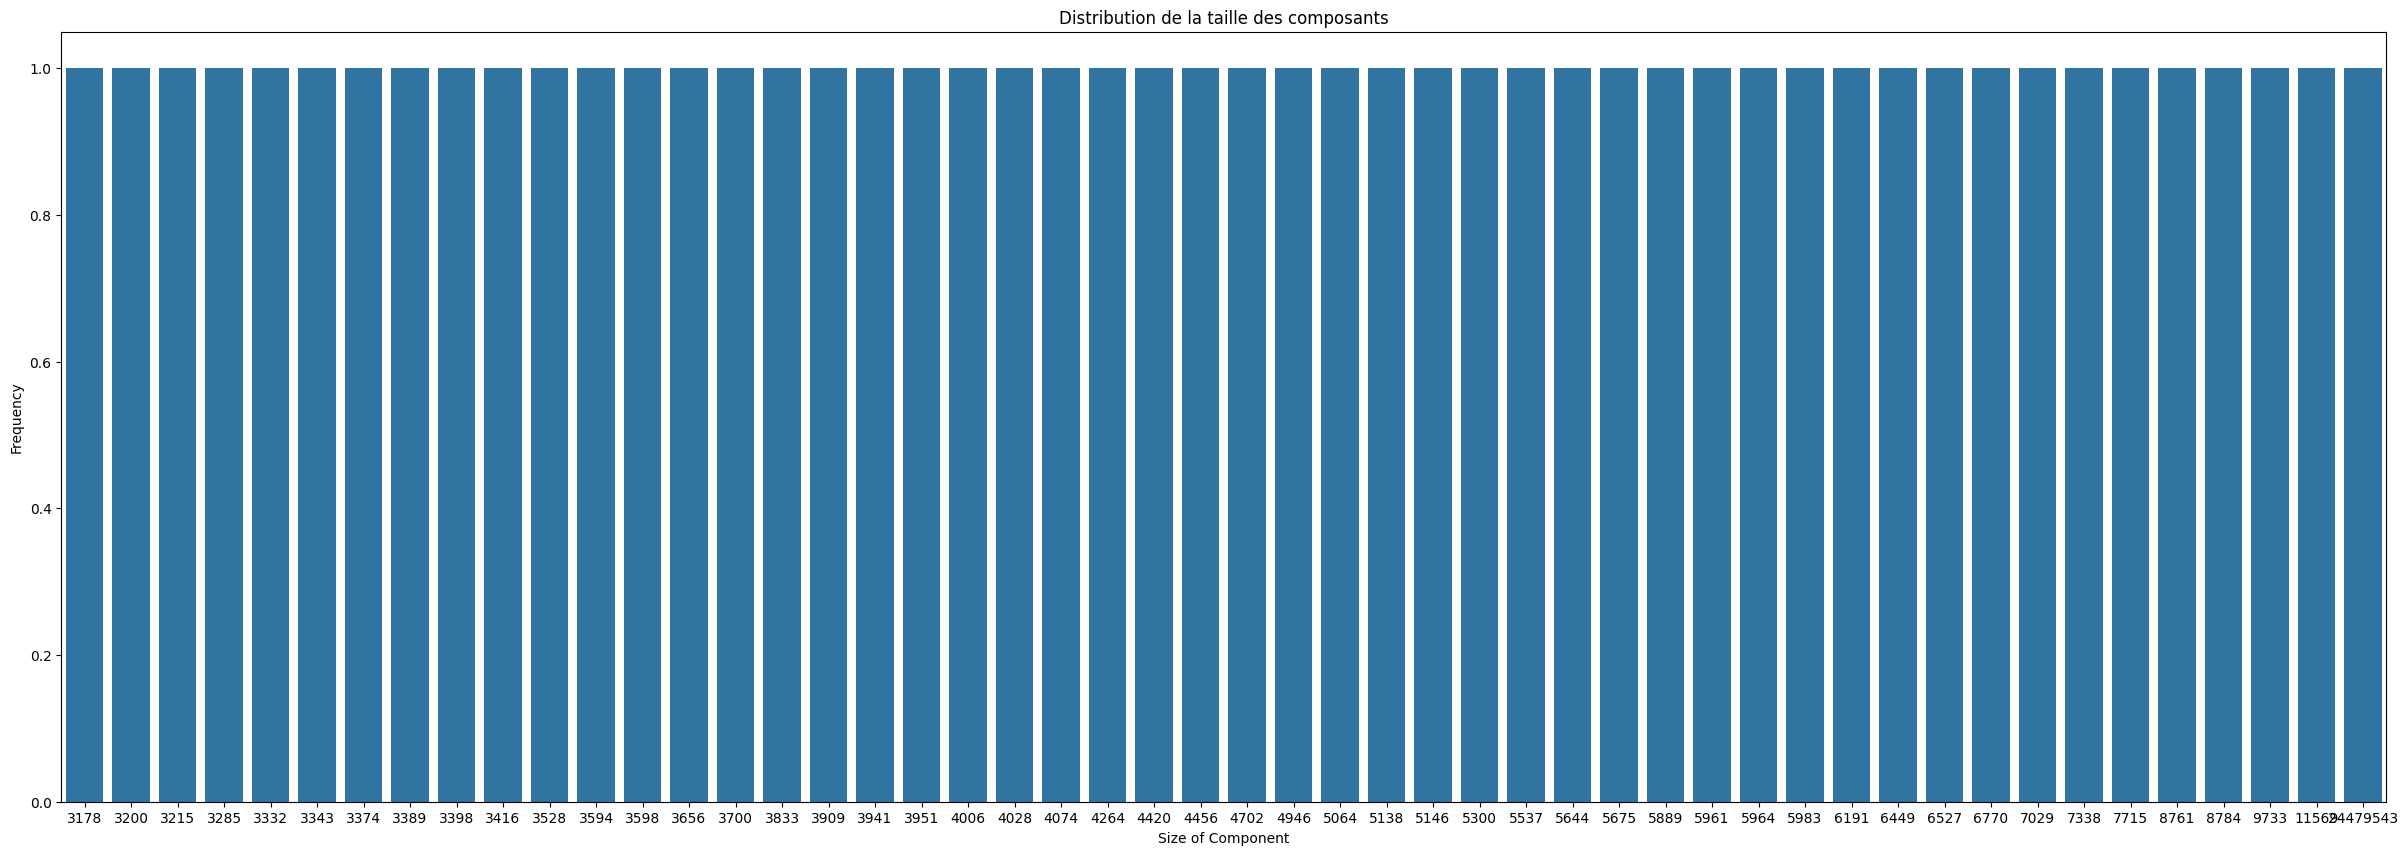

In [75]:
plt.figure(figsize=(30, 10))
sns.barplot(data=df_2, x='Size of Component', y='Frequency')

plt.xlabel('Size of Component')
plt.ylabel('Frequency')
plt.title('Distribution de la taille des composants')

plt.show()

## Trier le dictionnaire en fonction des fréquences de chaque taille de composantes

In [76]:
sorted_frequencies = dict(sorted(data_dict.items(), key=lambda item: item[1], reverse=True))
sorted_frequencies


{2: 46848540,
 3: 11061956,
 4: 3882564,
 5: 1703466,
 6: 1220311,
 7: 576355,
 8: 433305,
 9: 430156,
 10: 238221,
 12: 216852,
 11: 190777,
 13: 126102,
 15: 118404,
 14: 109627,
 16: 76935,
 18: 70440,
 17: 67462,
 19: 49822,
 21: 45157,
 20: 44020,
 22: 33365,
 24: 29730,
 23: 29702,
 25: 23599,
 26: 21549,
 27: 20787,
 28: 17025,
 29: 15634,
 30: 15115,
 31: 12794,
 32: 12000,
 33: 11271,
 34: 9824,
 35: 9145,
 36: 8662,
 37: 7895,
 38: 7261,
 39: 7061,
 40: 6478,
 41: 5793,
 42: 5621,
 43: 5240,
 44: 4846,
 45: 4582,
 46: 4297,
 47: 4083,
 48: 3954,
 49: 3608,
 50: 3448,
 51: 3287,
 52: 3108,
 53: 2948,
 54: 2771,
 55: 2730,
 56: 2573,
 57: 2385,
 58: 2363,
 59: 2205,
 60: 2073,
 61: 1998,
 63: 1971,
 62: 1970,
 64: 1749,
 65: 1722,
 66: 1675,
 67: 1577,
 69: 1539,
 68: 1512,
 70: 1384,
 71: 1355,
 73: 1309,
 72: 1285,
 74: 1246,
 75: 1153,
 77: 1100,
 79: 1099,
 76: 1069,
 78: 1033,
 81: 996,
 80: 969,
 82: 943,
 83: 908,
 87: 832,
 84: 818,
 85: 813,
 86: 784,
 88: 764,
 90: 74

In [77]:
top_20_frequencies = dict(islice(sorted_frequencies.items(), 20))
top_20_frequencies_df = pd.DataFrame(list(top_20_frequencies.items()), columns=['Size of Component', 'Frequency'])

In [78]:
palette = sns.color_palette("Paired", len(top_20_frequencies_df))
colors_html = [f'rgb({rgb[0]*255},{rgb[1]*255},{rgb[2]*255})' for rgb in palette]

fig = px.pie(top_20_frequencies_df, values='Frequency', names='Size of Component',
             title='Distribution des tailles des composants en pourcentage',
             color_discrete_sequence=colors_html)

fig.update_layout(width=1000, height=800)
fig.show()





# Échantillonnage des données

In [84]:
sampled_data = data.sample(n=10000, random_state=42)

## Calcul des fréquences de chaque taille

In [96]:
taille_frequence = sampled_data['size'].value_counts().reset_index()
taille_frequence.columns = ['Taille', 'Fréquence']
taille_frequence.head()




,Taille,Fréquence
0,2,6910
1,3,1620
2,4,577
3,5,265
4,6,176


## Pairplot

Selon le graphique ci-dessous, on remarque une corrélation inverse entre la fréquence et la taille des composantes.

<Figure size 1500x1000 with 0 Axes>

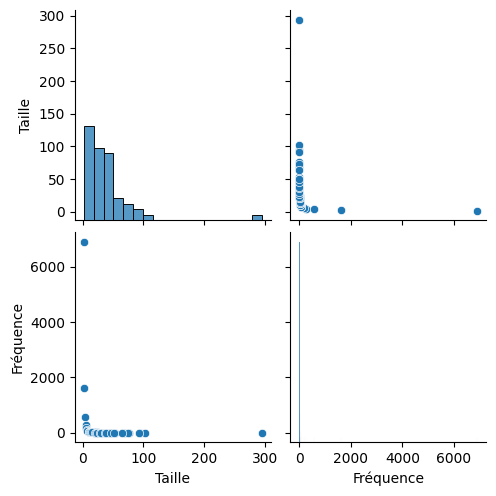

In [86]:
plt.figure(figsize=(15, 10))
sns.pairplot(taille_frequence)
plt.show()

## barplot

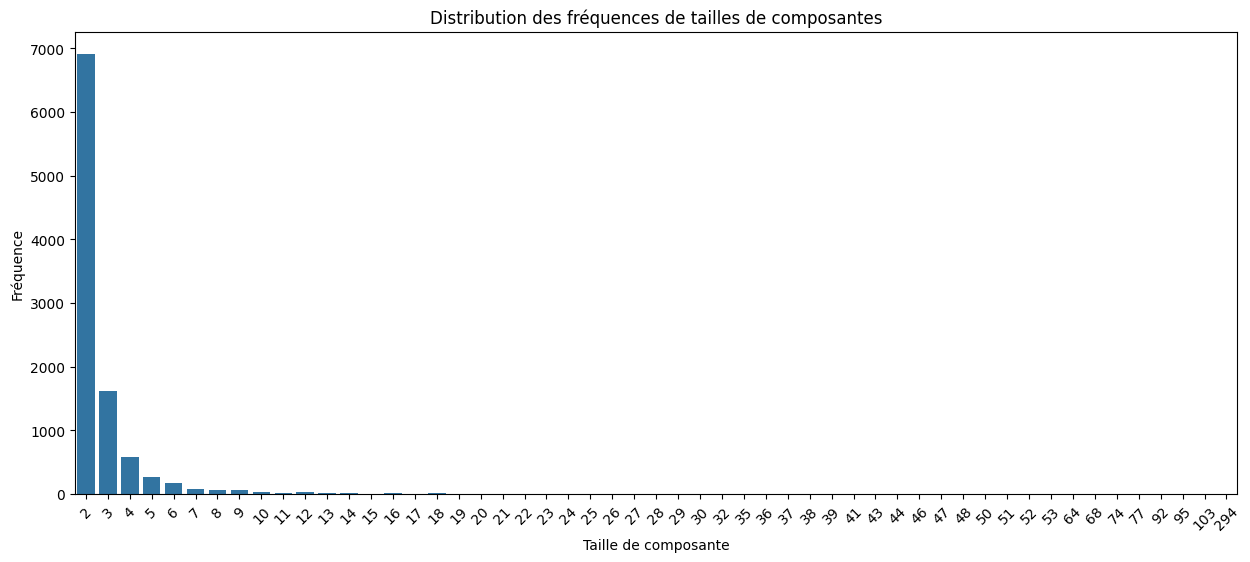

In [89]:
plt.figure(figsize=(15, 6))
sns.barplot(data=taille_frequence, x='Taille', y='Fréquence')
plt.title('Distribution des fréquences de tailles de composantes')
plt.xlabel('Taille de composante')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

## boxplot

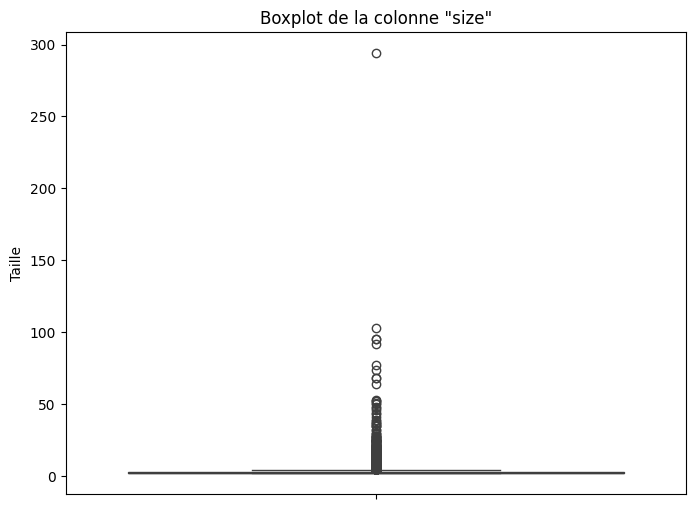

In [98]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sampled_data, y='size')
plt.title('Boxplot de la colonne "size"')
plt.ylabel('Taille')
plt.show()

#### Tronquer les valeurs aberrantes

In [102]:
Q1 = sampled_data['size'].quantile(0.25)  # Premier quartile
Q3 = sampled_data['size'].quantile(0.75)  # Troisième quartile

borne_sup = Q3 + 1.5 * (Q3 - Q1)

In [105]:
# Remplacer les outliers par le maximum
data_truncated = sampled_data.copy()
data_truncated.loc[data_truncated['size'] > borne_sup, 'size'] = borne_sup

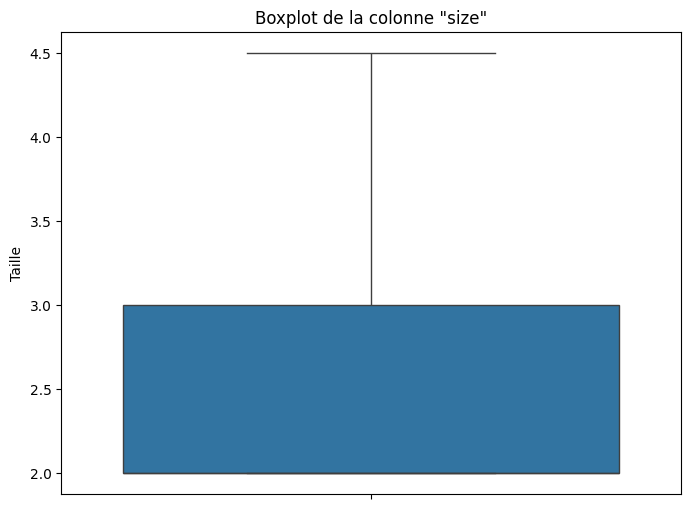

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_truncated, y='size')
plt.title('Boxplot de la colonne "size"')
plt.ylabel('Taille')
plt.show()

## violinplot

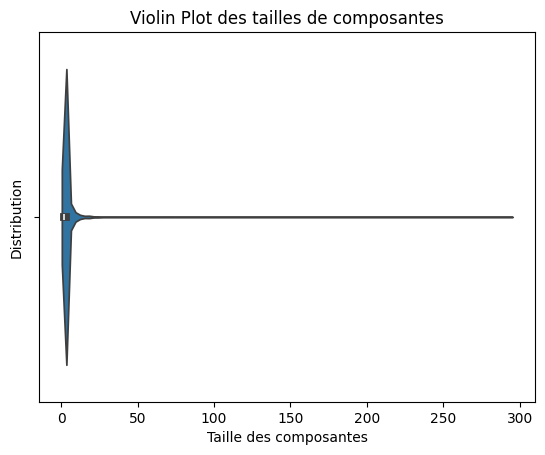

In [109]:
sns.violinplot(data=sampled_data, x="size", inner="box")
plt.title("Violin Plot des tailles de composantes")
plt.xlabel("Taille des composantes")
plt.ylabel("Distribution")
plt.show()